In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)
pokemon.head()

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [3]:
RG = pokemon[(pokemon['Class 1']=='Rock') | (pokemon['Class 1']=='Grass')|(pokemon['Class 2']=='Rock') | (pokemon['Class 2']=='Grass')]
RG = RG.drop(RG[(RG['Class 1']=='Rock') & (RG['Class 2']=='Grass')].index) #удаляю покемонов относящихся к обоим классам
RG = RG.drop(RG[(RG['Class 1']=='Grass') & (RG['Class 2']=='Rock')].index)
Grass = RG[(RG['Class 1']=='Grass') | (RG['Class 2']=='Grass')]
Rock = RG[(RG['Class 1']=='Rock') | (RG['Class 2']=='Rock')]

<AxesSubplot:xlabel='Attack', ylabel='Count'>

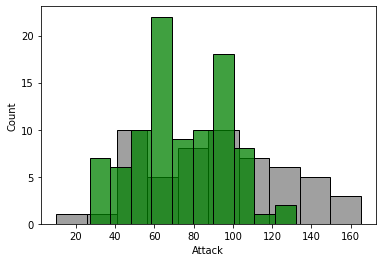

In [4]:
sns.histplot(data = Rock, x='Attack', color = 'grey', bins=10);
sns.histplot(data = Grass, x='Attack', color = 'green', bins=10)

Из графика выше видно, что распределение покемонов rock смещено вправо относительно покемонов grass и ольше походит на нормальное распределение. Давайте посмотрим на другие графики.

<AxesSubplot:xlabel='Attack'>

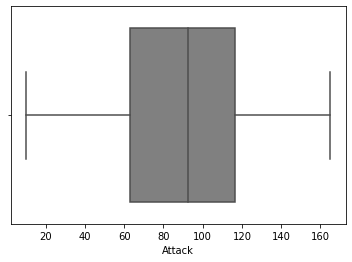

In [5]:
sns.boxplot(data=Rock, x='Attack', color='grey')

<AxesSubplot:xlabel='Attack'>

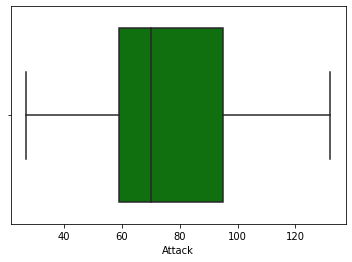

In [6]:
sns.boxplot(data=Grass, x='Attack', color='green')

По данным графикам можно сказать, что средняя атака rock покемонов на много больше чем у grass покемонов, но давайте дакажем это статиститчески. 

In [7]:
fvalue, pvalue = stats.f_oneway( Grass['Attack'], Rock['Attack'])
fvalue, pvalue

(13.908853861099336, 0.00027333381459902556)

Диспервионный анализ говорит о том, что мы можем отвергнуть Н0 (наши выборки равны). А чем больше F значение, тем больше различие в наших выборках

In [8]:
t , p  = stats.ttest_ind(Rock['Attack'], Grass['Attack'])
print("t = " + str(t))
print("p = " + str(p))

t = 3.729457582692065
p = 0.00027333381459902653


t-критейрий Стьюдента дает такие же результаты как и дисперсионный анализ

### Вывод: предположение о том, что атака grass покемонов выше - ошибочно

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [9]:
WN = pokemon[(pokemon['Class 1']=='Water') | (pokemon['Class 1']=='Water')|(pokemon['Class 2']=='Normal') | (pokemon['Class 2']=='Normal')]
WN = WN.drop(WN[(WN['Class 1']=='Water') & (WN['Class 2']=='Normal')].index) #удаляю покемонов относящихся к обоим классам
RG = WN.drop(WN[(WN['Class 1']=='Normal') & (WN['Class 2']=='Water')].index)
Water = WN[(WN['Class 1']=='Water') | (WN['Class 2']=='Water')]
Normal = WN[(WN['Class 1']=='Normal') | (WN['Class 2']=='Normal')]

In [10]:
print(len(Water))
print(len(Normal))

112
4


Выборки очень сильно отличаются по размерам

<AxesSubplot:xlabel='Speed', ylabel='Count'>

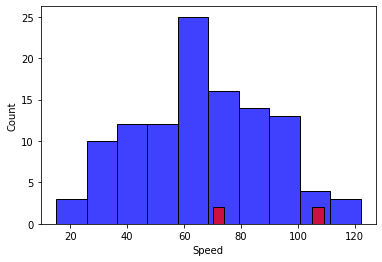

In [11]:
sns.histplot(data = Water, x='Speed', color = 'blue', bins=10);
sns.histplot(data = Normal, x='Speed', color = 'red', bins=10)

<AxesSubplot:xlabel='Speed'>

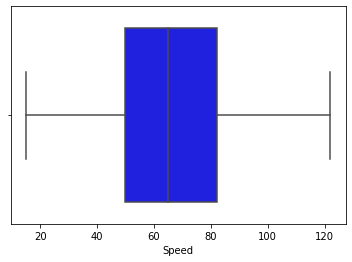

In [12]:
sns.boxplot(data=Water, x='Speed', color='blue')

<AxesSubplot:xlabel='Speed'>

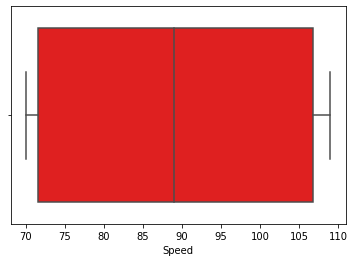

In [13]:
sns.boxplot(data=Normal, x='Speed', color='red')

Судя по графикам средняя скорость Normal покемонов выше чем у water покемонов

Как и в предыдущем анализе проведем дисперсионный анализ и воспользуемся t-тестом

In [14]:
fvalue, pvalue = stats.f_oneway( Water['Speed'], Normal['Speed'])
fvalue, pvalue

(3.968447790163462, 0.04875076869450466)

In [15]:
t , p  = stats.ttest_ind(Water['Speed'], Normal['Speed'])
print("t = " + str(t))
print("p = " + str(p))

t = -1.9920963305431452
p = 0.0487507686945045


p-value < 5% можно гвоорить об отвержении H0, а так же отрицательное t значение говорит о том, что среднее водяных покемонов меньше, чем среднее нормальных покемомонов

### Вывод: предположение о том, что скорость water покемонов выше - ошибочно

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [19]:
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']
treathed_pokemons = pokemon[pokemon['Name'].isin(treathed_pokemon)]
treathed_pokemons

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
19,20,Mega Beedrill,Bug,Poison,65,150,40,15,80,145,False
71,72,Mega Alakazam,Psychic,NaN,55,50,65,175,95,150,False
428,429,Deoxys Normal Forme,Psychic,NaN,50,150,50,150,50,150,True
476,477,Mega Lopunny,Normal,Fighting,65,136,94,54,96,135,False


In [33]:
normal_pokemons = pokemon[pokemon['Name'].isin(['Beedrill', 'Alakazam', 'Lopunny', 'Deoxys'])]
normal_pokemons
#не понял как найти Deoxys Normal Forme до применения сыворотки

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
18,19,Beedrill,Bug,Poison,65,90,40,45,80,75,False
70,71,Alakazam,Psychic,NaN,55,50,45,135,95,120,False
475,476,Lopunny,Normal,NaN,65,76,84,54,96,105,False


<AxesSubplot:xlabel='Speed', ylabel='Count'>

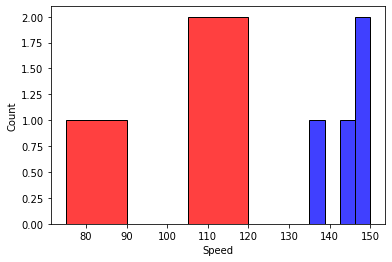

In [34]:
sns.histplot(data = treathed_pokemons, x='Speed', color = 'blue', bins=4);
sns.histplot(data = normal_pokemons, x='Speed', color = 'red', bins=3)

Сразу же видно, что наши выборки сильно отличаются. Скорость вакцинированных покемонов значительно выше, скорости обычных. Давайте посмотри на t критерий Стьюдента и проверим нашу гипотезу. 

In [36]:
t, p = stats.ttest_ind(treathed_pokemons['Speed'], normal_pokemons['Speed'])
print('t = ', t)
print('p = ', p)

t =  3.803194146278325
p =  0.012587298890900028


### Вывод: Большое Т значние говорит о разности наших выборок. p-value < 5%, значит мы можем говорить об отвержении Н0 (различия случайны), а значит наши различия статистически значимы. 


<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [38]:
legends = pokemon[pokemon['Legendary']== True]
regular = pokemon[pokemon['Legendary']== False]

In [42]:
legends['sum_'] = legends['HP'] + legends['Attack'] + legends['Defense']
legends['mult'] = legends['HP'] * legends['Attack'] * legends['Defense']
regular['sum_'] = regular['HP'] + regular['Attack'] + regular['Defense']
regular['mult'] = regular['HP'] * regular['Attack'] * regular['Defense']

<ipython-input-42-f2f6f15ba033>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legends['sum_'] = legends['HP'] + legends['Attack'] + legends['Defense']
<ipython-input-42-f2f6f15ba033>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  legends['mult'] = legends['HP'] * legends['Attack'] * legends['Defense']
<ipython-input-42-f2f6f15ba033>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

<AxesSubplot:xlabel='sum_', ylabel='Count'>

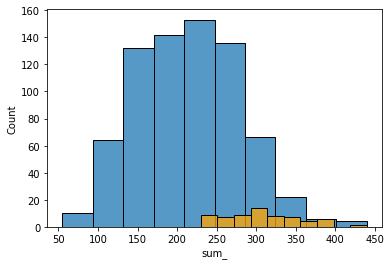

In [45]:
sns.histplot(data=regular, x='sum_', bins=10)
sns.histplot(data=legends, x='sum_', color='orange', bins=10)

In [58]:
t, p = stats.ttest_ind(legends['sum_'], regular['sum_'])
f, p2 = stats.f_oneway(legends['sum_'], regular['sum_'])
print('t = ', t)
print('p = ', p)
print('f = ', f)
print('p2 =', p2)

t =  11.591852366462316
p =  7.970942205722087e-29
f =  134.37104128585798
p2 = 7.970942205720804e-29


Большое t и f значение, очень маленькое p-value, следовательно наши различия не случайны и сумма у легендарных покемонов выше, чем у обычных

<AxesSubplot:xlabel='mult', ylabel='Count'>

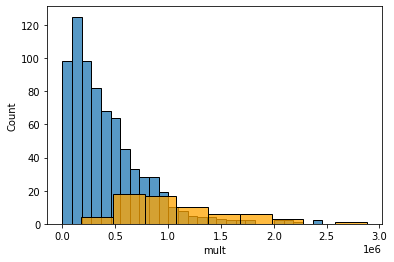

In [51]:
sns.histplot(data=regular, x='mult')
sns.histplot(data=legends, x='mult', color='orange')

In [59]:
t, p = stats.ttest_ind(legends['mult'], regular['sum_'])
f, p2 = stats.f_oneway(legends['mult'], regular['sum_'])
print('t = ', t)
print('p = ', p)
print('f = ', f)
print('p2 =', p2)

t =  57.3065756036807
p =  4.538166774882627e-285
f =  3284.043607420371
p2 = 4.538166774882413e-285


Большое t и f значение, очень маленькое p-value, следовательно наши различия не случайны и сумма у легендарных покемонов выше, чем у обычных

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class

In [94]:
Rock = pokemon[(pokemon['Class 1']=='Rock')|(pokemon['Class 2']=='Rock')]
Rock = Rock.drop(Rock[(Rock['Class 1'].isin(['Ground','Steel','Ice']))|(Rock['Class 2'].isin(['Ground','Steel','Ice']))].index)
Ground = pokemon[(pokemon['Class 1']=='Ground')|(pokemon['Class 2']=='Ground')]
Ground = Ground.drop(Ground[(Ground['Class 1'].isin(['Rock','Steel','Ice']))|(Ground['Class 2'].isin(['Rock','Steel','Ice']))].index)
Steel = pokemon[(pokemon['Class 1']=='Steel')|(pokemon['Class 2']=='Steel')]
Steel = Steel.drop(Steel[(Steel['Class 1'].isin(['Rock','Ground','Ice']))|(Steel['Class 2'].isin(['Rock','Ground','Ice']))].index)
Ice = pokemon[(pokemon['Class 1']=='Ice')|(pokemon['Class 2']=='Ice')]
Ice = Ice.drop(Ice[(Ice['Class 1'].isin(['Rock','Ground','Steel']))|(Ice['Class 2'].isin(['Rock','Ground','Steel']))].index)

In [95]:
print('Rock', len(Rock))
print('Ground', len(Ground))
print('Steel', len(Steel))
print('Ice', len(Ice))

Rock 41
Ground 52
Steel 40
Ice 33


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe0af0fa9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe0b0c3d2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe0ab9aea00>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe0af015520>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe0b0c3fe50>,
 'means': []}

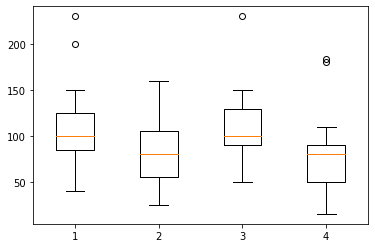

In [99]:
plt.boxplot([Rock['Defense'], Ground['Defense'], Steel['Defense'], Ice['Defense']])

Для сравнения нескольких групп, воспользуемся дисперсионным анализом

In [103]:
alpha = 0.05
f, p = stats.f_oneway(Rock['Defense'], Ground['Defense'], Steel['Defense'], Ice['Defense'])
print('f =', f)
print('p =', p)
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

f = 8.820416931465497
p = 1.885892116821956e-05
Разное распределение (отклоняем H0)


Распределния разные, следовательно мы не можем сказать, что защита всех рассматриваемых групп одинакова. Из графика выше, я бы выделил 1 и 3 график в одну группу и 2 и 4 в другую, так как медианы, а так же 25 и 75 перцентиль находятся очень близко (внутри двух групп)